In [5]:
import pandas as pd
import numpy as np

In [18]:
data = [[1,2,3],[4,5,6],[7,8,9]]
col = ['col1','col2','col3']
row = ['row1','row2','row3']
df = pd.DataFrame(data=data,index=row,columns=col)
print(df)

      col1  col2  col3
row1     1     2     3
row2     4     5     6
row3     7     8     9


In [19]:
df.insert(2, 'col4', [10,11,12])

In [20]:
df

,col1,col2,col4,col3
row1,1,2,10,3
row2,4,5,11,6
row3,7,8,12,9


In [21]:
df.iloc[:, 3]

row1    3
row2    6
row3    9
Name: col3, dtype: int64

In [22]:
df.insert(3,'col3',[10,11,12],allow_duplicates=True)
print(df)

      col1  col2  col4  col3  col3
row1     1     2    10    10     3
row2     4     5    11    11     6
row3     7     8    12    12     9


In [23]:
data = [[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]]
col = ['col1','col2','col3','col4']
row = ['row1','row2','row3','row4']
df = pd.DataFrame(data=data,index=row,columns=col)
print(df)

      col1  col2  col3  col4
row1     1     2     3     4
row2     5     6     7     8
row3     9    10    11    12
row4    13    14    15    16


In [24]:
df.pop('col3')
df

,col1,col2,col4
row1,1,2,4
row2,5,6,8
row3,9,10,12
row4,13,14,16


In [25]:
df

,col1,col2,col4
row1,1,2,4
row2,5,6,8
row3,9,10,12
row4,13,14,16


In [30]:
row = ['row1','row2','row3']
col = ['col1','col2','col3']
data = [[1,2,3],[4,5,6],[7,8,9]]
df = pd.DataFrame(data=data, index=row, columns=col)
print(df)

      col1  col2  col3
row1     1     2     3
row2     4     5     6
row3     7     8     9


In [31]:
df.drop(labels='row2', axis=0)

,col1,col2,col3
row1,1,2,3
row3,7,8,9


axis 기본값이 0으로 설정되어 있는것 같다.

In [32]:
df.drop(labels='row2')

,col1,col2,col3
row1,1,2,3
row3,7,8,9


In [33]:
df.drop(labels='col1')

KeyError: "['col1'] not found in axis"

copy

In [34]:
row = ['row1','row2','row3','row4']
col = ['col1','col2','col3','col4']
data = [[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]]
df = pd.DataFrame(data=data, index=row, columns=col)
print(df)

      col1  col2  col3  col4
row1     1     2     3     4
row2     5     6     7     8
row3     9    10    11    12
row4    13    14    15    16


In [37]:
df.truncate(before='row2',after='row3',axis=0, copy=False)
df

,col1,col2,col3,col4
row1,1,2,3,4
row2,5,6,7,8
row3,9,10,11,12
row4,13,14,15,16


차원축소, 스칼라 변환 (squeeze)

In [38]:
df=pd.DataFrame(data=[[1,2],[3,4]],index=['row1','row2'],columns=['col1','col2'])
print(df)

      col1  col2
row1     1     2
row2     3     4


In [39]:
df_row=df.drop(index='row1')
print(df_row)

      col1  col2
row2     3     4


In [40]:
print(df_row.squeeze())

col1    3
col2    4
Name: row2, dtype: int64


In [41]:
df_col=df.drop(columns='col1')
print(df_col)

      col2
row1     2
row2     4


In [42]:
print(df_col.squeeze())

row1    2
row2    4
Name: col2, dtype: int64


pivot_table

In [43]:
col = ['Machine','Country','Grade','Price','Count']
data = [['TV','Korea','A',1000,3],
        ['TV','Korea','B', 800,8],
        ['TV','Korea','B', 800,2],
        ['TV','Japan','A',1300,5],
        ['TV','Japan','A',1300,1],
        ['PC','Korea','B',1500,6],
        ['PC','Korea','A',2000,9],
        ['PC','Japan','A',3000,3],
        ['PC','Japan','B',2500,3]]
df = pd.DataFrame(data=data, columns=col)
print(df)

  Machine Country Grade  Price  Count
0      TV   Korea     A   1000      3
1      TV   Korea     B    800      8
2      TV   Korea     B    800      2
3      TV   Japan     A   1300      5
4      TV   Japan     A   1300      1
5      PC   Korea     B   1500      6
6      PC   Korea     A   2000      9
7      PC   Japan     A   3000      3
8      PC   Japan     B   2500      3


In [55]:
print(df.pivot_table(values='Price',index=['Machine','Country'],columns='Grade'))

Grade                 A       B
Machine Country                
PC      Japan    3000.0  2500.0
        Korea    2000.0  1500.0
TV      Japan    1300.0     NaN
        Korea    1000.0   800.0


explode

In [94]:
data = [[[1,2],['a','b']],[3,'c']]
idx = ['row1','row2']
col = ['col1','col2']
df1 = pd.DataFrame(data =data, index = idx, columns = col)
print(df)

           col1 col2       col3
row1  [1, 2, 3]    0  [a, b, c]
row2          4   []          3
row3          5    2  [x, y, z]


In [95]:
data= [[[1,2,3],0,['a','b','c']],[4,[],3],[5,2,['x','y','z']]]
idx = ['row1','row2','row3']
col = ['col1','col2','col3']
df2 = pd.DataFrame(data = data, index = idx, columns = col)
print(df)

           col1 col2       col3
row1  [1, 2, 3]    0  [a, b, c]
row2          4   []          3
row3          5    2  [x, y, z]


In [96]:
print(df2.explode(column='col1'))

     col1 col2       col3
row1    1    0  [a, b, c]
row1    2    0  [a, b, c]
row1    3    0  [a, b, c]
row2    4   []          3
row3    5    2  [x, y, z]


In [97]:
print(df2.explode('col1'))

     col1 col2       col3
row1    1    0  [a, b, c]
row1    2    0  [a, b, c]
row1    3    0  [a, b, c]
row2    4   []          3
row3    5    2  [x, y, z]


In [104]:
print(df1.explode(column=['col1','col2']))

ValueError: column must be a scalar

In [84]:
print( pd.__version__ )

0.25.1


column의 list나 tuple을 제공하는 형태는 pandas 1.3.0버전 이상에서 가능

In [2]:
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]], index=['row1', 'row2', 'row3'], columns=['col1', 'col2', 'col3'])
print(df)

      col1  col2  col3
row1     1     2     3
row2     4     5     6
row3     7     8     9


In [5]:
result = df.index
print(result)

Index(['row1', 'row2', 'row3'], dtype='object')


In [2]:
data = [[1,2,3],[4,5,6],[7,8,9]]
col = ['col1','col2','col3']
row = ['row1','row2','row3']
df = pd.DataFrame(data=data,index=row,columns=col)
print(df)

      col1  col2  col3
row1     1     2     3
row2     4     5     6
row3     7     8     9


In [6]:
df.keys()

Index(['col1', 'col2', 'col3'], dtype='object')

In [5]:
df1.keys

<bound method Series.keys of idx1    1
idx2    2
dtype: int64>

In [4]:
df=pd.DataFrame({
    'A':[10,20,10,30,10],
    'B':[None, True, False, None, True]
})
df

,A,B
0,10,None
1,20,True
2,10,False
3,30,None
4,10,True


In [5]:
df.duplicated(subset='A', keep='first')

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [6]:
df.duplicated(subset='B', keep='last')

0     True
1     True
2    False
3    False
4    False
dtype: bool

In [10]:
df = pd.DataFrame({'Account_number':[1,1,2,2,2,3,3],
'Product':['A', 'A', 'A', 'B', 'B','A', 'B']
})
df

,Account_number,Product
0,1,A
1,1,A
2,2,A
3,2,B
4,2,B
5,3,A
6,3,B


In [8]:
df.pivot_table(index='Account_number', columns='Product', aggfunc=len, fill_value=0)

Product,A,B
Account_number,,
1,2,0
2,1,2
3,1,1


In [9]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int64)
arr3 = arr1 - arr2
print(arr3.dtype)

float64


In [16]:
df.pivot_table(index='Account_number', columns='Product', aggfunc=len)

Product,A,B
Account_number,,
1,2.0,NaN
2,1.0,2.0
3,1.0,1.0


In [11]:
data = [[1,np.NaN],['A',4.1],['-','3']]
df = pd.DataFrame(data)
address = 'C:\\Users\\Song\\Desktop\\test\\' #기본 경로 설정해줌(코딩이 길어지므로)
df

,0,1
0,1,NaN
1,A,4.1
2,-,3


In [12]:
df.to_csv(path_or_buf=address+'test1.csv')

In [13]:
df.to_csv(path_or_buf=address+'test3.csv', na_rep=100)

In [17]:
df.to_csv(path_or_buf=address+'test4.csv', float_format='123')

In [18]:
df.to_csv(path_or_buf=address+'test11.csv',quoting=2) # 숫자가 아닌 경우 인용구 처리

## 부분회귀 플롯


In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [26]:
boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()

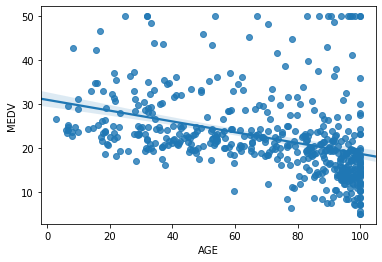

In [17]:
sns.regplot(x="AGE", y="MEDV", data=df)
plt.show()

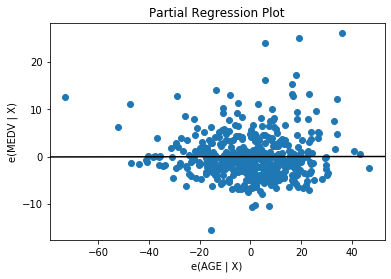

In [19]:
others = list(set(df.columns).difference(set(["MEDV", "AGE"])))
p, resids = sm.graphics.plot_partregress(
    "MEDV", "AGE", others, data=df, obs_labels=False, ret_coords=True
)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


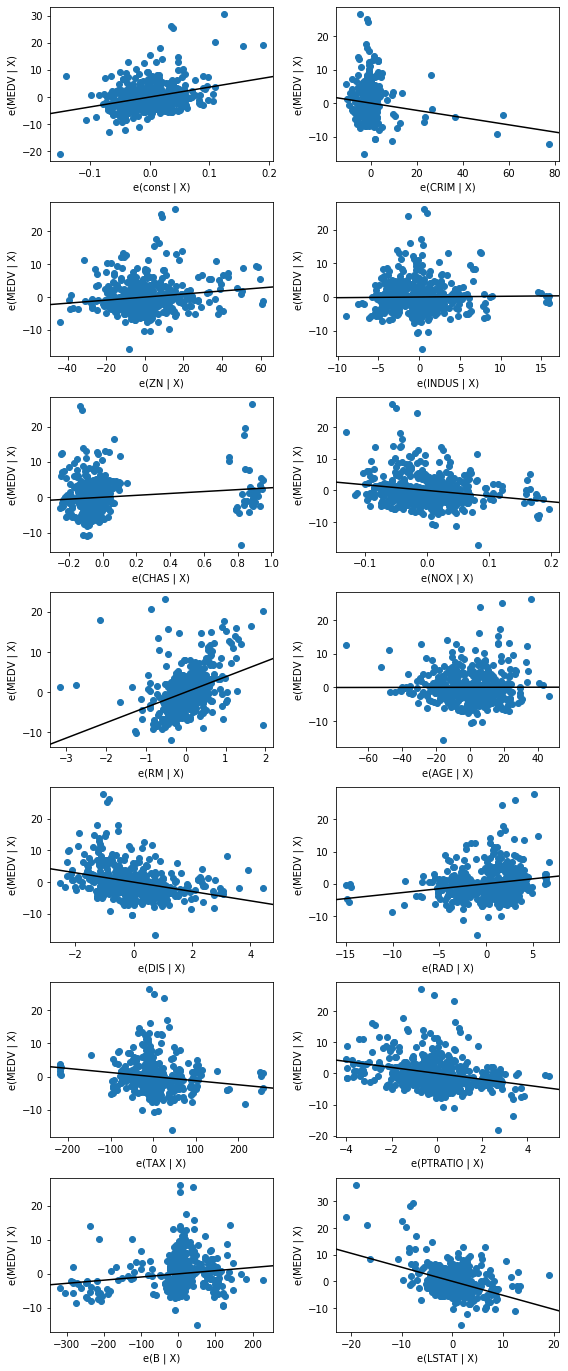

In [20]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

## CCPR 플롯

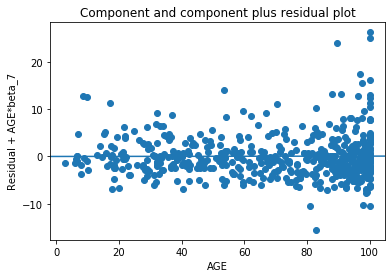

In [21]:
sm.graphics.plot_ccpr(result_boston, "AGE")
plt.show()

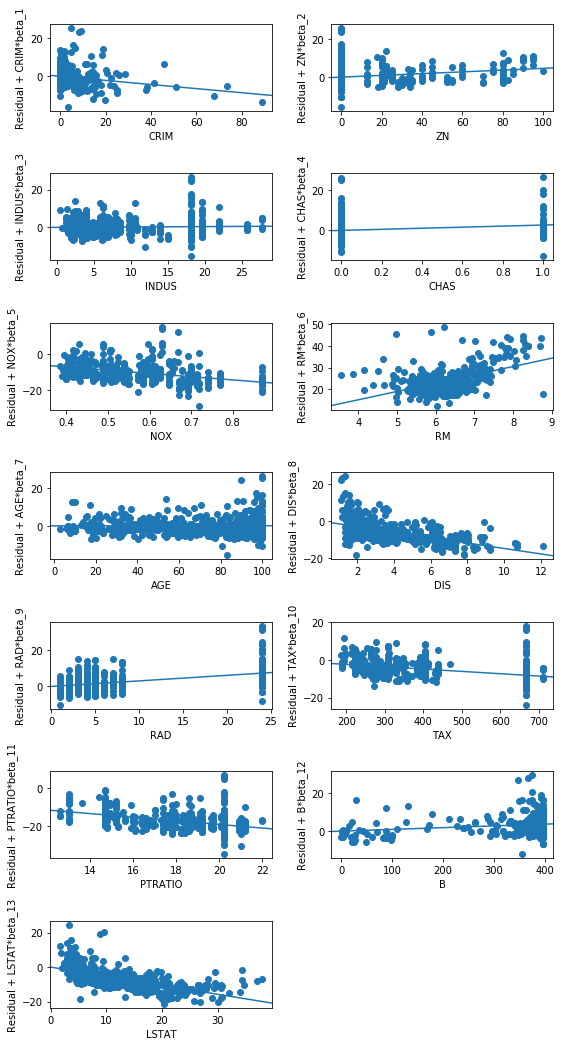

In [22]:
fig = plt.figure(figsize=(8, 15))
sm.graphics.plot_ccpr_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

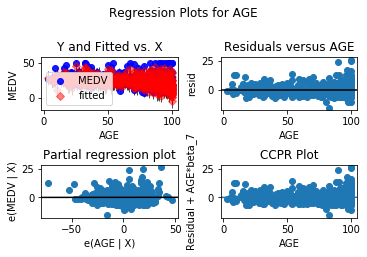

In [23]:
fig = sm.graphics.plot_regress_exog(result_boston, "AGE")
plt.tight_layout(pad=4, h_pad=0.5, w_pad=0.5)
plt.show()

## 부트스트래핑

In [27]:
from sklearn.datasets import make_regression

In [28]:
X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20,
                              coef=True, random_state=0)
coef

array(42.38550486)

In [29]:
dfX0 = pd.DataFrame(X0, columns=["X1"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["y"])

model = sm.OLS(dfy, dfX)
result = model.fit()

In [30]:
result.params

const    -1.628364
X1       42.853356
dtype: float64

In [31]:
%%time
N = 1000
params_w0 = np.zeros(N)
params_w1 = np.zeros(N)
for i in range(N):
    idx = np.random.choice(len(dfy), len(dfy), replace=True)
    dfX2 = dfX.iloc[idx, :]
    dfy2 = dfy.iloc[idx]
    r = sm.OLS(dfy2, dfX2).fit()
    params_w0[i] = r.params.const
    params_w1[i] = r.params.X1

Wall time: 797 ms


SyntaxError: invalid syntax (<ipython-input-41-d9a0276360e9>, line 1)

In [54]:
import matplotlib.font_manager as fm
from matplotlib import rc, font_manager
# 디렉토리 및 파일 이름에 맞추어 변경


font_location = 'C:/Windows/Fonts/Hancom Gothic Regular.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

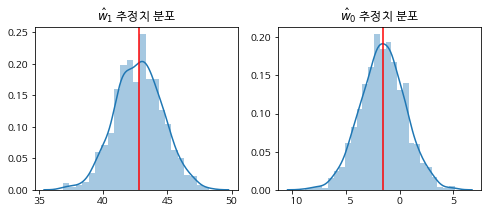

In [55]:
plt.figure(figsize=(8, 3))

ax1 = plt.subplot(121)
sns.distplot(params_w1, ax=ax1)
plt.axvline(params_w1.mean(), c='r')
plt.title("$\hat{w}_1$ 추정치 분포")

ax2 = plt.subplot(122)
sns.distplot(params_w0, ax=ax2)
plt.axvline(params_w0.mean(), c='r')
plt.title("$\hat{w}_0$ 추정치 분포")
plt.show()

In [56]:
params_w1.mean(), params_w1.std()

(42.77351103922523, 1.8537054782671707)

In [57]:
params_w0.mean(), params_w0.std()

(-1.5498522800345458, 2.0829608168606133)

In [58]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Fri, 27 May 2022   Prob (F-statistic):           2.21e-36
Time:                        00:07:11   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4

## 잔차의 분포

In [60]:
import scipy as sp

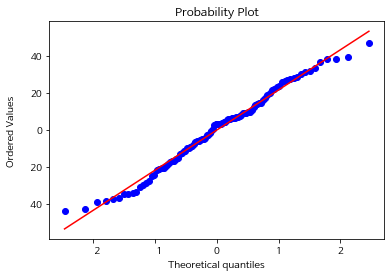

In [61]:
sp.stats.probplot(result.resid, plot=plt)
plt.show()

In [62]:
test = sm.stats.omni_normtest(result.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       :  3.523
P-value     :  0.172


In [63]:
test = sm.stats.jarque_bera(result.resid)
for xi in zip(['Jarque-Bera', 'P-value', 'Skew', 'Kurtosis'], test):
    print("%-12s: %6.3f" % xi)

Jarque-Bera :  2.059
P-value     :  0.357
Skew        : -0.073
Kurtosis    :  2.312


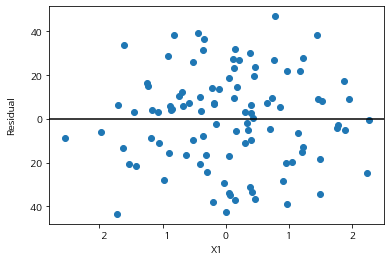

In [64]:
plt.plot(X0, result.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("X1")
plt.ylabel("Residual")
plt.show()

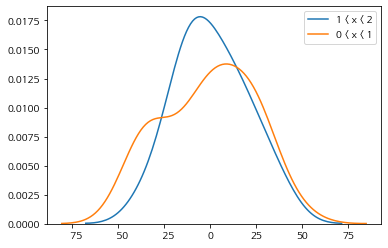

In [65]:
sns.kdeplot(result.resid[((1 < X0) & (X0 < 2)).flatten()], label="1 < x < 2")
sns.kdeplot(result.resid[((0 < X0) & (X0 < 1)).flatten()], label="0 < x < 1")
plt.legend()
plt.show()

In [66]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Fri, 27 May 2022   Prob (F-statistic):           2.21e-36
Time:                        00:26:20   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4

In [67]:
print(result.t_test("X1 = 40"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            42.8534      2.142      1.332      0.186      38.603      47.104


In [68]:
import datetime
from calendar import isleap

df_nottem = sm.datasets.get_rdataset("nottem").data 

def convert_partial_year(number):
    year = int(number)
    d = datetime.timedelta(days=(number - year) * (365 + isleap(year)))
    day_one = datetime.datetime(year, 1, 1)
    date = d + day_one
    return date

df_nottem["date0"] = df_nottem[["time"]].applymap(convert_partial_year)
df_nottem["date"] = pd.DatetimeIndex(df_nottem["date0"]).round('60min') + datetime.timedelta(seconds=3600*24)
df_nottem["month"] = df_nottem["date"].dt.strftime("%m").astype('category')
del df_nottem["date0"], df_nottem["date"]

model_nottem = sm.OLS.from_formula("value ~ C(month) + 0", df_nottem)
result_nottem = model_nottem.fit()
print(result_nottem.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Fri, 27 May 2022   Prob (F-statistic):          2.96e-125
Time:                        00:28:23   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[01]    39.6950      0.518     76.691   

In [69]:
print(result_nottem.t_test("C(month)[01] = C(month)[02]"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.5050      0.732      0.690      0.491      -0.937       1.947


In [70]:
print(result_nottem.t_test("C(month)[03] = C(month)[02]"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             3.0050      0.732      4.105      0.000       1.563       4.447
